In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from mpl_toolkits.mplot3d import Axes3D

In [2]:
df=pd.DataFrame(pd.read_csv('/content/drive/MyDrive/abalone.csv'))
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
df.isnull().any()

Sex               False
Length            False
Diameter          False
Height            False
Whole weight      False
Shucked weight    False
Viscera weight    False
Shell weight      False
Rings             False
dtype: bool

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Number of males 1528
Number of females 1342
Number of trans 1307


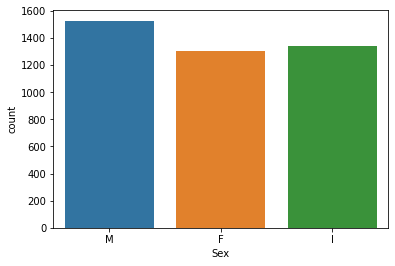

In [10]:
sns.countplot(data=df,x='Sex',label='Count')
m,f,i=df['Sex'].value_counts()
print('Number of males',m)
print('Number of females',f)
print('Number of trans',i)

In [11]:
df['Sex']=np.where(df['Sex']=='F',0,df['Sex'])
df['Sex']=np.where(df['Sex']=='M',1,df['Sex'])
df['Sex']=np.where(df['Sex']=='I',2,df['Sex'])

In [12]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


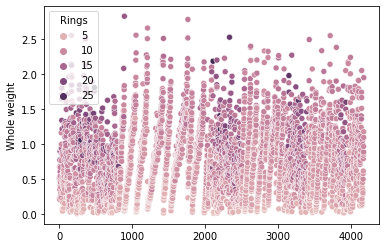

In [14]:
sns.scatterplot(x=df.index,y=df['Whole weight'],hue=df['Rings'])

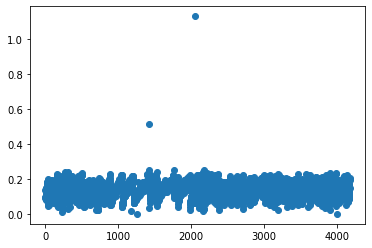

In [15]:
plt.scatter(df.index,df['Height'])

Text(0, 0.5, 'Rings')

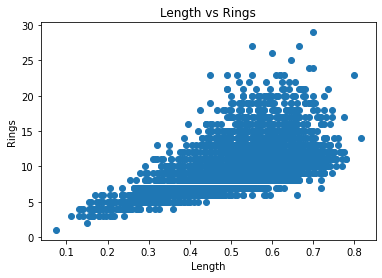

In [16]:
plt.scatter(df['Length'],df['Rings'])
plt.title('Length vs Rings')
plt.xlabel('Length')
plt.ylabel('Rings')

Text(0, 0.5, 'Viscera weight')

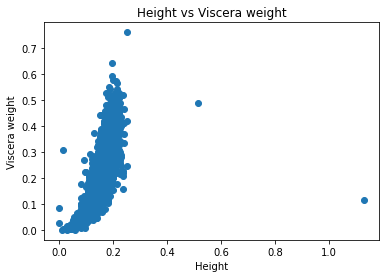

In [17]:
plt.scatter(df['Height'],df['Viscera weight'])
plt.title('Height vs Viscera weight')
plt.xlabel('Height')
plt.ylabel('Viscera weight')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


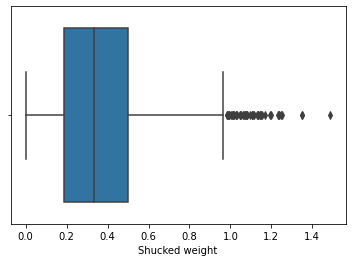

In [18]:
sns.boxplot(df['Shucked weight'])

In [19]:
Q1=np.percentile(df['Shucked weight'],25,interpolation = 'midpoint')
Q3=np.percentile(df['Shucked weight'],75,interpolation = 'midpoint')
IQR=Q3-Q1

In [20]:
df.shape

(4177, 9)

In [21]:
upper=np.where(df['Shucked weight'] >= (Q3+1.5*IQR))
lower=np.where(df['Shucked weight'] <= (Q1-1.5*IQR))

In [22]:
df.drop(upper[0],inplace = True)
df.drop(lower[0],inplace = True)

In [23]:
df.shape

(4129, 9)

In [24]:
x=df.drop(columns='Rings')
y=df['Rings']

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=4)

In [26]:
x_train.shape

(3303, 8)

In [27]:
y_train.shape

(3303,)

In [28]:
x_test.shape

(826, 8)

In [29]:
y_test.shape

(826,)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
reg=LinearRegression()

In [34]:
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
reg.score(x_test,y_test)

0.5066471607389202

In [36]:
reg.coef_

array([ -0.39936441,   1.49517781,  10.68642985,   8.63335562,
         9.4297715 , -21.10100745, -10.73004935,   8.6944531 ])